The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our neeed libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5);

Here, we will be using logistic regression (logistic classification). Logistic regression/classification models use elements from both the linear regression and the KNN algorithms. Let's create a model to utilize the different measurements of properties of glass that can ultimately be used to identify the glass type.

In [2]:
# Let's read in the data #
glass = pd.read_csv('./data/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Dictionary**

- `RI`: Refractive index
- `(unit measurements: weight percent in corresponding oxide)`
- `Na`: Sodium
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type`: Type of glass

In [3]:
# Let's change the columns to something more uniform #
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

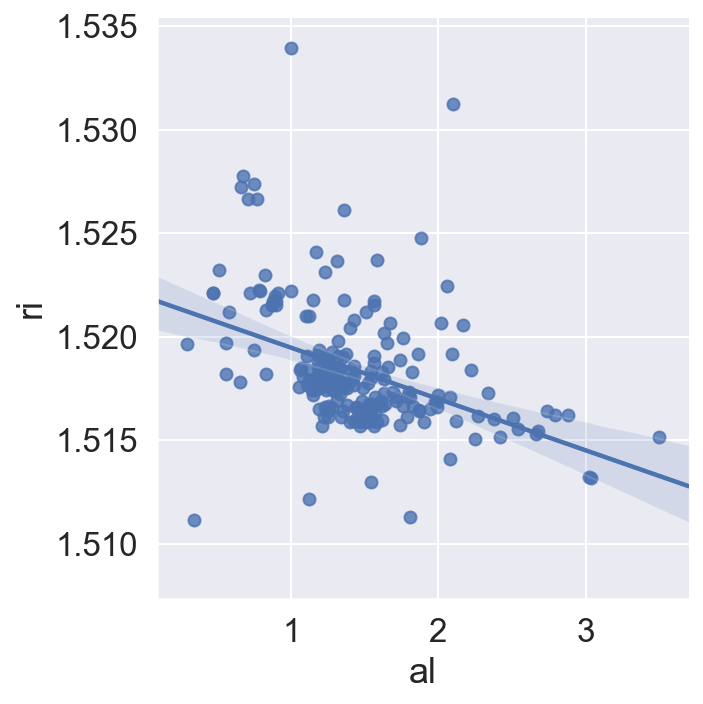

In [4]:
# Let's assume we want to predict ri only using the feature al. Let's create a quick scatter plot #
sns.lmplot(x='al', y='ri', data=glass);

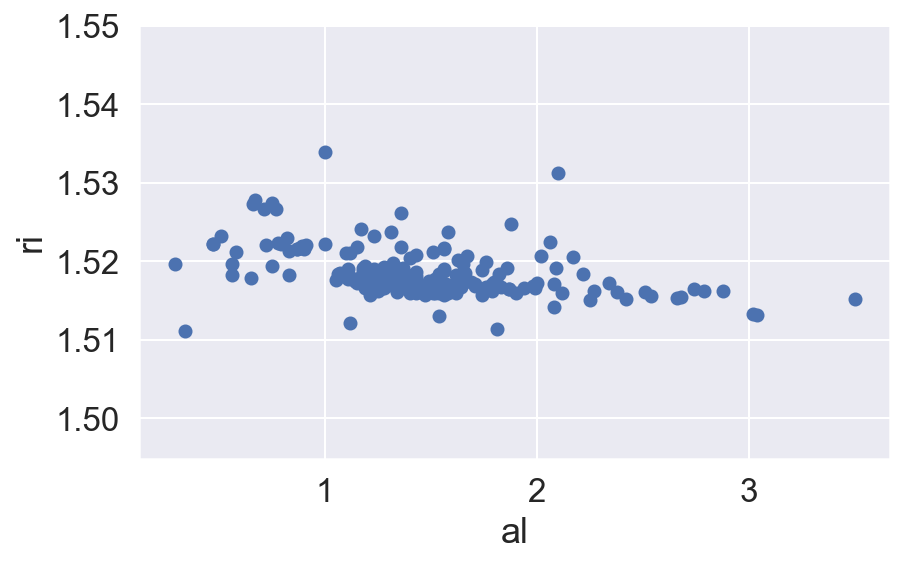

In [5]:
# Let's just take a look at the data points for now #
plt.scatter(glass.al, glass.ri);
plt.xlabel('al');
plt.ylabel('ri');

In [6]:
# Let's check how a linear regression model would fit the data #
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

linear intercept: 1.5219453302386425
linear coefficient: [-0.00247761]


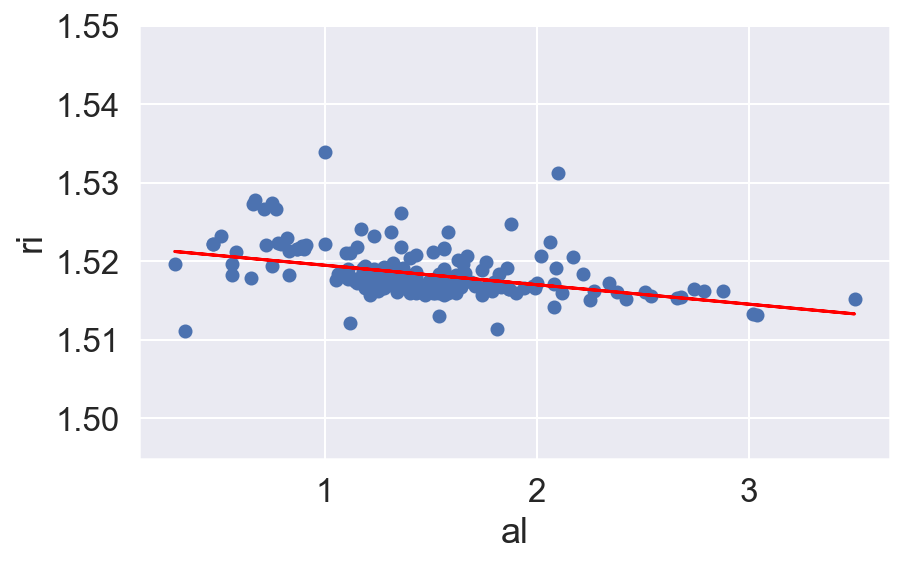

In [7]:
# Let's use the linear regression model to make predictions and compare it to the original data #
y_pred = linreg.predict(X)
glass['y_pred'] = y_pred

plt.scatter(glass.al, glass.ri);
plt.plot(glass.al, glass.y_pred, color='red');
plt.xlabel('al');
plt.ylabel('ri');
print('linear intercept:',linreg.intercept_)
print('linear coefficient:',linreg.coef_)

We can see that linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

In [8]:
# Let's check out the glass_type feature #
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Let's assume that these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

In [9]:
# Let's create a new household column that indicates whether or not a row is household glass #
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


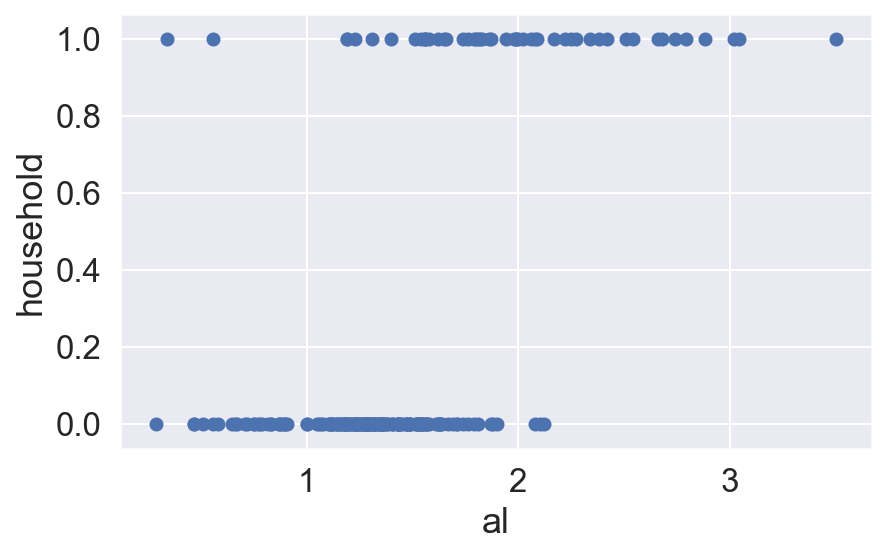

In [10]:
# Now, let's assume that we're predicting the household category using al #
plt.scatter(glass.al, glass.household);
plt.xlabel('al');
plt.ylabel('household');

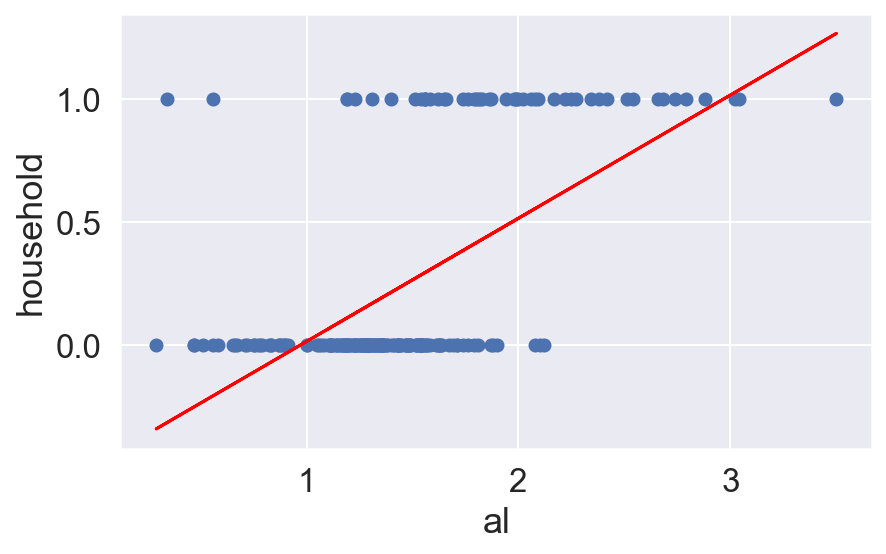

In [11]:
# Like before, let's fit a linear regression model to make predictions and compare it to the original data #
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

plt.scatter(glass.al, glass.household);
plt.plot(glass.al, glass.household_pred, color='red');
plt.xlabel('al');
plt.ylabel('household');

We can see above that the linear regression model isn't really useful since our dataset isn't continuous. We need a threshold to differentiate the categories. Let's create a new column of our predictions for whether a row is considered household glass.

In [12]:
# Let's transform household_pred to 1 or 0 #
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


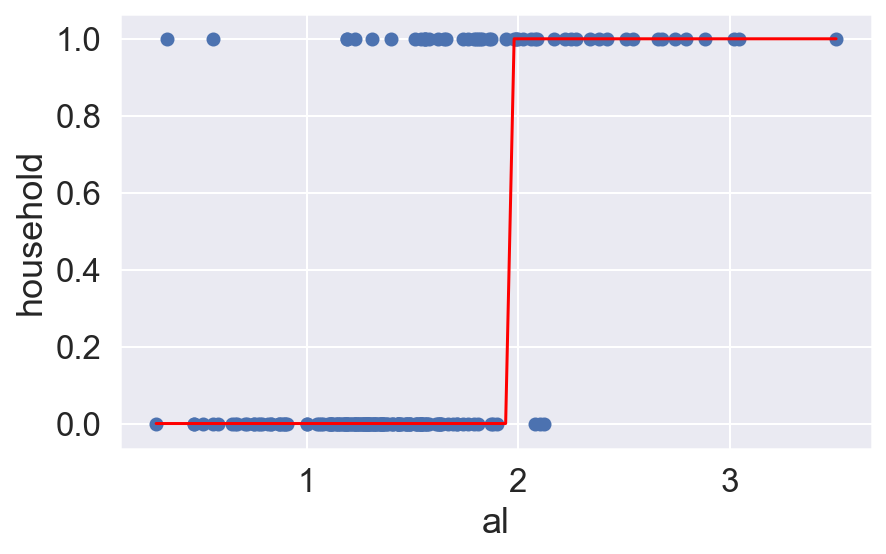

In [13]:
# Let's sort the data values so we can have a continuous line #
glass.sort_values('al', inplace=True)

# Now, let's plot the class predictions #
plt.scatter(glass.al, glass.household);

plt.xlabel('al');
plt.ylabel('household');

plt.plot(glass.al, glass.household_pred_class, color='red');

Logistic regression is a more appropriate method for what we just did with the linear regression model above. This is because the values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. However, logistic regression ensures that the values output as predictions; which can be interpreted as probabilities of class membership. Let's continue with a logistic regression model.

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


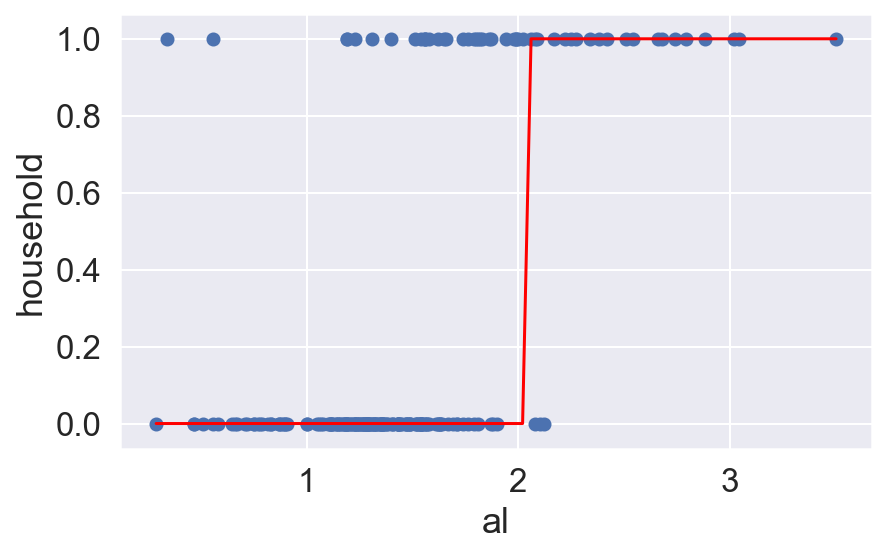

In [14]:
# Let's fit a logistic regression model to make predictions and compare it to the original data #
logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

plt.scatter(glass.al, glass.household);
plt.plot(glass.al, pred, color='red');
plt.xlabel('al');
plt.ylabel('household');

In [15]:
# We can also check the predicted probabilities to see how confident we are in a given prediction #
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

In [16]:
# Let's store the predicted probabilities of class 1 #
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
115,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.00,0.00,2,1.518650,0,0.180729,0,0.189496
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2,1.517238,0,0.466400,0,0.423841
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2,1.518378,0,0.235859,0,0.225818
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6,1.517833,1,0.346118,0,0.312241
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7,1.517015,1,0.511506,1,0.468533
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2,1.520285,0,-0.150048,0,0.058385
104,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2,1.519047,0,0.100541,0,0.144916
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2,1.517634,0,0.386212,0,0.347787
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6,1.520558,1,-0.205177,0,0.047347
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1,1.518799,0,0.150659,0,0.171654


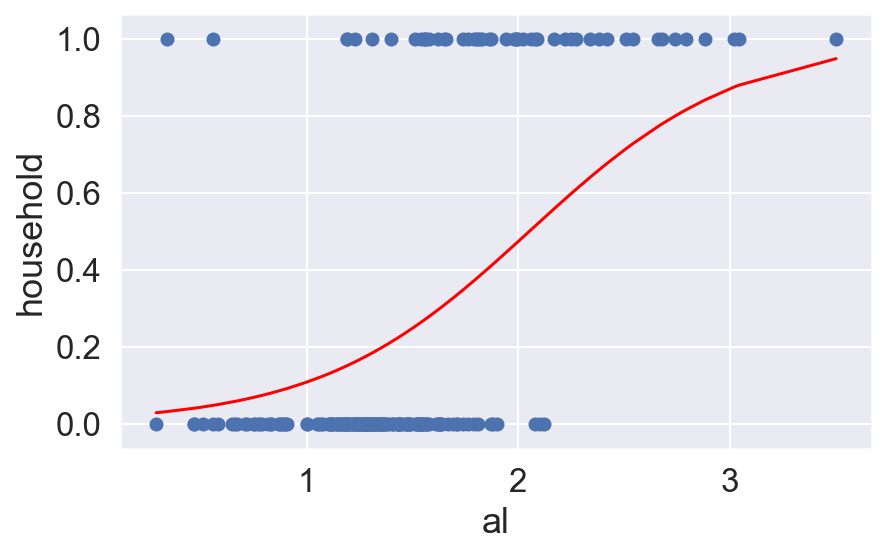

In [17]:
# Let's plot the predicted probabilities #
plt.scatter(glass.al, glass.household);
plt.plot(glass.al, glass.household_pred_prob, color='red');
plt.xlabel('al');
plt.ylabel('household');

Let's create a logistic regression model and train it using two features to predict the glass type. 

In [18]:
LR = LogisticRegression()
X = glass[['na','fe']]
y = glass.household

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print('accuracy:',LR.score(X_test, y_test))

accuracy: 0.7962962962962963


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Let's continue practicing with logistic regression on bank marketing data. Our goal is to predict whether a customer will purchase a bank product marketed over the phone.

In [19]:
# Let's read in the data #
bank = pd.read_csv('./data/bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


** Note: target '`y`' represented as such**
    - No : 0
    - Yes : 1

In [20]:
# Let's check the value counts of y #
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [21]:
# Let's take about 6 randomly chosen features and build two separate models #
features = ['age','job','marital','education','contact','day_of_week','y']

for feat in features:
    if feat != 'age':
        print(bank[feat].value_counts())

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
cellular     2652
telephone    1467
Name: contact, dtype: int64
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64
0    3668
1     451
Name: y, dtype: int64


Note: We have some unknown values in education, marital and employment. We can make some assumptions but given the relatively small counts, we will choose to drop the unknowns as we do not want to encorporate any additional bias into the data itself.

In [22]:
# Let's create the sub dataframe with only the features we're using #
bank_a =  bank[features]

# Let's also drop the unknowns within our chosen features #
bank_a = bank_a[bank_a['education'] != 'unknown']
bank_a = bank_a[bank_a['job'] != 'unknown']
bank_a = bank_a[bank_a['marital'] != 'unknown']

Let's build the first model using the features age, job, education, and day_of_week.

In [23]:
# Let's create dummy variables #
bank_md1 = pd.get_dummies(bank_a[['age','job','education','day_of_week','y']], drop_first = True)

# Let's instantiate the model #
LogReg1 = LogisticRegression()

# Let's secure our X and y features #
X1 = bank_md1.drop('y', axis =1)
y1 = bank_md1['y']

# Let's use train test split to cross validate #
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state=42)

# Now, let's fit the model #
LogReg1.fit(x_train1, y_train1)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Let's get the coefficient values for each feature used #
name = bank_md1.columns.drop('y')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,age,0.00762961
1,job_blue-collar,-0.426391
2,job_entrepreneur,-1.49324
3,job_housemaid,-0.444983
4,job_management,-0.426168
5,job_retired,0.608415
6,job_self-employed,-0.330618
7,job_services,-0.405957
8,job_student,0.904477
9,job_technician,-0.0304069


In [25]:
# Let's make predictions with the model and check the accuracy #
y_pred = LogReg1.predict(x_test1)
baseline = 1. - bank_md1.y.mean()
print('baseline:',baseline)
print('accuracy:',metrics.accuracy_score(y_test1,y_pred))

baseline: 0.8922094508301405
accuracy: 0.898876404494382


In [26]:
# Let's create a confusion matrix #
metrics.confusion_matrix(y_test1,y_pred)

array([[880,   0],
       [ 99,   0]], dtype=int64)

In [27]:
# Let's check AUROC #
metrics.roc_auc_score(y_test1,y_pred)

0.5

In [28]:
# Let's check log loss #
metrics.log_loss(y_test1,y_pred)

3.492685253417935

We can see that our accuracy looks great at first. However, against the baseline, this accuracy is barely better than the baseline and such an insignificant difference could just be from how our train test split groupped the data. Furthermore, when looking at the confusion matrix above, it seems like we have 880 true negatives and 99 false negatives; which indicates that the model might just be predicting 'no' everytime. We can also observe the Area Under the ROC Curve is 0.5, which is worthless and states that our model gains no more insight than random guessing. Let's continue with our second model.

In [29]:
# Let's create dummy variables #
bank_md2 = pd.get_dummies(bank_a, drop_first = True)

# Let's instantiate the model #
LogReg2 = LogisticRegression()

# Let's secure our X and y features #
X2 = bank_md2.drop('y', axis =1)
y2 = bank_md2['y']

# Let's use train test split to cross validate #
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state=42)

# Now, let's fit the model #
LogReg2.fit(x_train2, y_train2)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Let's get the coefficient values for each feature used #
name = bank_md2.columns.drop('y')

coef = LogReg2.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,age,0.0143316
1,job_blue-collar,-0.345223
2,job_entrepreneur,-1.39848
3,job_housemaid,-0.384801
4,job_management,-0.394074
5,job_retired,0.472354
6,job_self-employed,-0.289769
7,job_services,-0.318289
8,job_student,0.809601
9,job_technician,-0.0412194


In [31]:
# Let's make predictions with the model and check the accuracy #
y_pred2 = LogReg2.predict(x_test2)
baseline = 1. - bank_md2.y.mean()
print('baseline:',baseline)
print('accuracy:',metrics.accuracy_score(y_test2,y_pred2))

baseline: 0.8922094508301405
accuracy: 0.898876404494382


In [32]:
# Let's create a confusion matrix #
metrics.confusion_matrix(y_test2,y_pred2)

array([[880,   0],
       [ 99,   0]], dtype=int64)

In [33]:
# Let's check AUROC #
metrics.roc_auc_score(y_test2,y_pred2)

0.5

In [34]:
# Let's check log loss #
metrics.log_loss(y_test2,y_pred2)

3.492685253417935

We can see that none of the metrics really changed. Thus, the features we chose aren't very helpful. However, before we revert to grabbing more features, let's attempt adjusting the probability threshold.

In [35]:
# Let's check the predicted probabilities #
y_pred_prob = LogReg2.predict_proba(x_test2)

y_pred_prob

array([[0.81582351, 0.18417649],
       [0.93532482, 0.06467518],
       [0.81732417, 0.18267583],
       ...,
       [0.82688588, 0.17311412],
       [0.95322693, 0.04677307],
       [0.89817216, 0.10182784]])

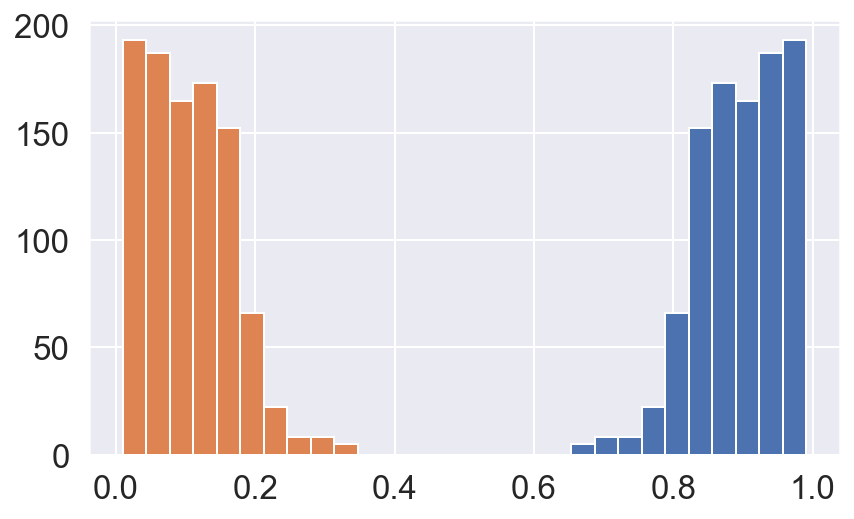

In [36]:
# Let's plot the predicted probabilities #
y_pred_prob_t = y_pred_prob.transpose()

plt.hist(y_pred_prob_t[0]);
plt.hist(y_pred_prob_t[1]);
plt.show();

In [37]:
# Let's try decreaseing the threshold to 20% predicted probability or higher #
y_pred3 = []

for prob in y_pred_prob_t[1]:
    if prob > .20:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
        
print(len(y_pred3))
print(len(y_test2))

979
979


In [38]:
# Let's make predictions with the model and check the accuracy #
baseline = 1. - bank_md2.y.mean()
print('baseline:',baseline)
print('accuracy:',metrics.accuracy_score(y_test2,y_pred3))

baseline: 0.8922094508301405
accuracy: 0.8610827374872319


In [39]:
# Let's create a confusion matrix #
metrics.confusion_matrix(y_test2,y_pred3)

array([[834,  46],
       [ 90,   9]], dtype=int64)

In [40]:
# Let's check AUROC #
metrics.roc_auc_score(y_test2,y_pred3)

0.5193181818181818

In [41]:
# Let's check log loss #
metrics.log_loss(y_test2,y_pred3)

4.798069837783086

It seems that we have not improved the model at all. Let's attempt creating a model using all of the features.

In [42]:
# Let's create dummy variables #
bank_all = pd.get_dummies(bank, drop_first = True)

# Let's instantiate the model #
LogReg3 = LogisticRegression(penalty='l1',C=0.01)

# Let's secure our X and y features #
X3 = bank_all.drop('y', axis =1)
y3 = bank_all['y']

# Let's use train test split to cross validate #
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state=42)

# Now, let's fit the model #
LogReg3.fit(x_train3, y_train3)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Let's get the coefficient values for each feature used #
name = bank_all.columns.drop('y')

coef = LogReg3.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,age,0.00322696
1,duration,0.00473115
2,campaign,0
3,pdays,-0.00210741
4,previous,0
5,emp.var.rate,0
6,cons.price.idx,0.0306625
7,cons.conf.idx,0.0351074
8,euribor3m,-0.400286
9,nr.employed,-0.00041354


In [44]:
# Let's make predictions with the model and check the accuracy #
y_pred3 = LogReg3.predict(x_test3)
baseline = 1. - bank_all.y.mean()
print('baseline:',baseline)
print('accuracy:',metrics.accuracy_score(y_test3,y_pred3))

baseline: 0.8905074047098811
accuracy: 0.9087378640776699


In [45]:
# Let's create a confusion matrix #
metrics.confusion_matrix(y_test3, y_pred3)

array([[895,  26],
       [ 68,  41]], dtype=int64)

In [46]:
# Let's check AUROC #
metrics.roc_auc_score(y_test3, y_pred3)

0.6739583022044248

In [47]:
# Let's check log loss #
metrics.log_loss(y_test3,y_pred3)

3.152102689956106

Let's try regularization to optimize our model.

In [48]:
# Let's secure our X and y features #
X = bank_all.drop('y', axis =1)
y = bank_all['y']

# Let's use train test split to cross validate #
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Create loop to find best AUROC given regularization (c) value #
cees = [0.01, 0.1, 1.0, 10, 100]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print('AUROC:',roc,'for C =',c)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6739583022044248 for C = 0.01


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6815039496359163 for C = 0.1


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6936367530307106 for C = 1.0
AUROC: 0.6901353733974837 for C = 10
AUROC: 0.6941796411957486 for C = 100


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# Create loop to find best AUROC given regularization (c) value #
cees = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7 ,1.8, 1.9]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print('AUROC:',roc,'for C =',c)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6965952444988993 for C = 1.1
AUROC: 0.701182400462202 for C = 1.2


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6976810208289753 for C = 1.3
AUROC: 0.6965952444988993 for C = 1.4


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6976810208289753 for C = 1.5
AUROC: 0.6971381326639373 for C = 1.6


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUROC: 0.6976810208289753 for C = 1.7
AUROC: 0.6971381326639373 for C = 1.8
AUROC: 0.6971381326639373 for C = 1.9
